In [64]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA', FutureWarning)

In [65]:
df=pd.read_csv('AMZN.csv', parse_dates=['Date'], index_col=['Date'], dayfirst=True)
df.columns=['Actual']
df.head()

,Actual
Date,
2021-01-04,3186.629883
2021-01-05,3218.510010
2021-01-06,3138.379883
2021-01-07,3162.159912
2021-01-08,3182.699951


In [90]:
rcParams['figure.figsize'] = 12, 5

figure = df.plot()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

NameError: name 'rcParams' is not defined

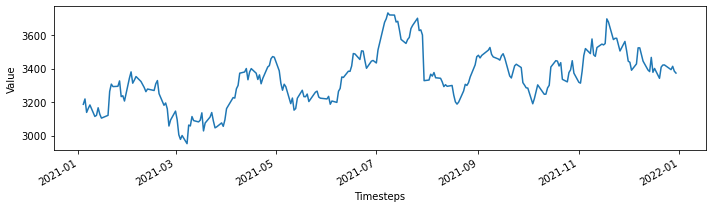

In [66]:
fig, ax = plt.subplots(figsize=(10,3))

ax.plot(df)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

fig.autofmt_xdate()
plt.tight_layout()

In [67]:
train_size = (int)(0.7 * df.shape[0])

#Breaking data set into test and training
df_train = pd.DataFrame(df[0:train_size])
df_test = pd.DataFrame(df[train_size:df.shape[0]])

df_train = df_train.dropna()

  # p=1 # number of lags
  # #X contains the lagged values, hence we skip the first column
  # X_train = df_train.iloc[:,1:].values.reshape(-1,p)
  # #Y contains the value,it is the first column
  # y_train = df_train.iloc[:,0].values.reshape(-1,1)

In [89]:
arma_mod10_train = ARIMA(df_train, order=(0, 0, 1)).fit()

print(arma_mod10.params)

const     3311.327029
ar.L1        0.954946
sigma2    2439.009610
dtype: float64


/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-in

In [69]:
arma_mod20 = ARIMA(df_train, order=(2, 0, 0)).fit()

/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [70]:
arma_mod30 = ARIMA(df_train, order=(3, 0, 0)).fit()

/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [71]:
print(arma_mod10.params)
print(arma_mod20.params)
print(arma_mod30.params)

const     3311.327029
ar.L1        0.954946
sigma2    2439.009610
dtype: float64
const     3311.324284
ar.L1        1.054507
ar.L2       -0.103889
sigma2    2412.284985
dtype: float64
const     3311.323676
ar.L1        1.057873
ar.L2       -0.135360
ar.L3        0.029526
sigma2    2410.198996
dtype: float64


# Residual values

In [72]:
resid10 = arma_mod10.resid
resid20 = arma_mod20.resid
resid30 = arma_mod30.resid
print(resid10)

Date
2021-01-04   -124.697146
2021-01-05     26.262049
2021-01-06    -84.311884
2021-01-07     15.988106
2021-01-08     13.819497
                 ...    
2021-09-07     38.751492
2021-09-08     25.128943
2021-09-09    -31.690786
2021-09-10     -7.223235
2021-09-13     -4.869463
Length: 175, dtype: float64


# Plot residuals

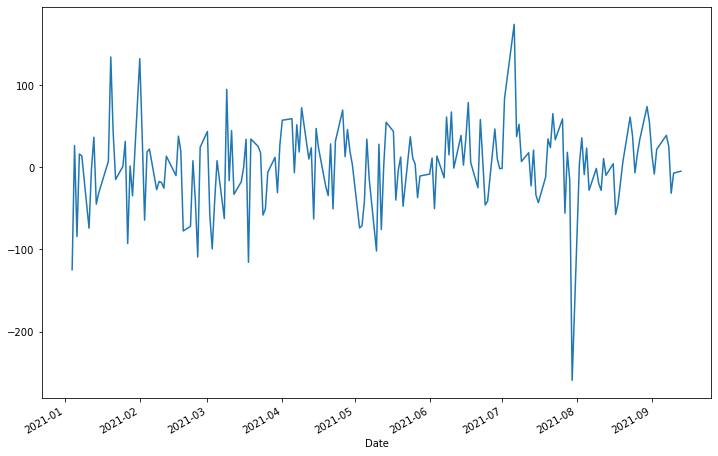

In [73]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax = resid10.plot(ax=ax)

In [74]:
predictions = arma_mod10.predict(start=len(df_train), end=len(df_train) + len(df_test)-1)
print(predictions)

175    3450.599149
176    3444.324413
177    3438.332378
178    3432.610308
179    3427.146038
          ...     
246    3316.603786
247    3316.366048
248    3316.139022
249    3315.922223
250    3315.715192
Name: predicted_mean, Length: 76, dtype: float64


/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


Text(0.5, 0, 'Lags')

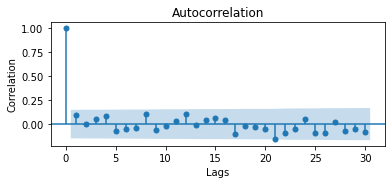

In [88]:
fig = plt.figure(figsize=(6, 5))
ax1 = fig.add_subplot(211)
fig = plot_acf(resid10, lags=30, ax=ax1)
plt.ylabel('Correlation')
plt.xlabel('Lags')
# ax2 = fig.add_subplot(212)
# fig = plot_pacf(resid10, lags=40, ax=ax2)